<a href="https://colab.research.google.com/github/samdvies/pyTorchDeepLearnIntro/blob/main/03_ML_NLFT_sd2323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 [40 marks]

1. **Data Transformation Function:** Write a function to transform the provided data while retaining its original feature space dimensions. The objective is to get linearly separable data through this transformation. The resulting transformed data, represented as `x1_transformed` and `x2_transformed` can then be merged into a single NumPy array, serving as input for the pla function as we did with the original data.

2. **Visualisation and Execution:** Generate a plot that visually demonstrates the linear separability achieved by the transformed data. Execute the Perceptron Learning Algorithm (`pla`) using this transformed data. Present the following outcomes:
  - Final classifier weights.
  - Visualisation of the decision boundary.
  - Display of correctly classified samples.
  - Identification of the iteration at which the PLA achieved perfect classification.

3. **Visualisation in the Original Feature Space:** Create a plot of the original labeled data and overlay the deicision boundary expressed in the original coordinates.

In [3]:
# Task 1
def transform_data(x1, x2):

    x1_transformed = x1 ** 2
    x2_transformed = x2 ** 2
    return x1_transformed, x2_transformed

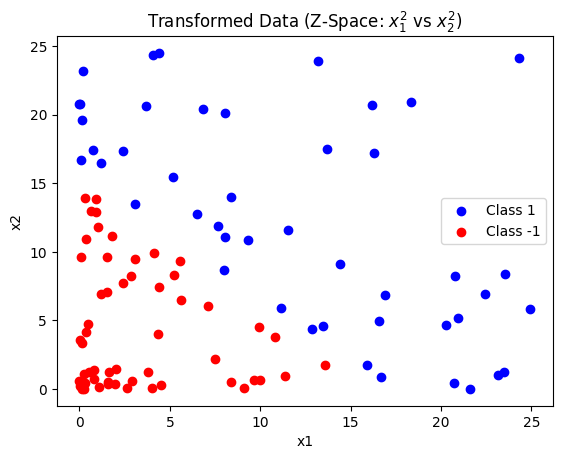

--- Running PLA on Transformed Data ---

Final Weights: [-137.            8.10810749    8.70700393]
PLA achieved perfect classification at iteration: 16


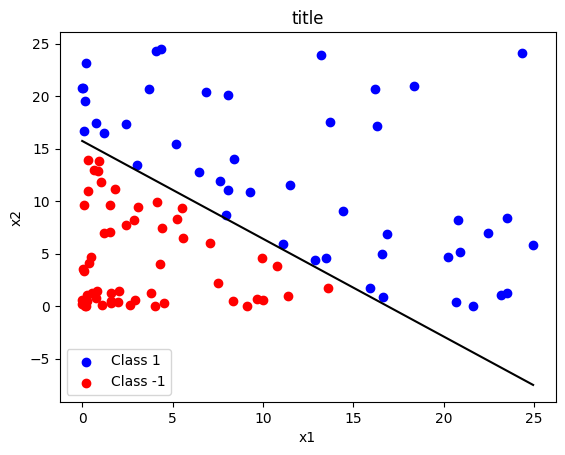

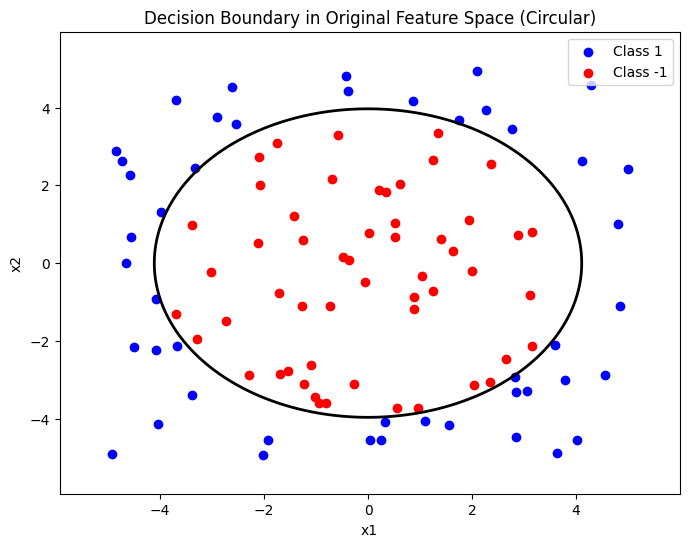

In [8]:
# Task 1 (continued)
x1_trans, x2_trans = transform_data(x1, x2)

X_transformed = np.column_stack((x1_trans, x2_trans))

plot_data(x1_trans, x2_trans, labels, 'Transformed Data (Z-Space: $x_1^2$ vs $x_2^2$)')

print("--- Running PLA on Transformed Data ---")

#PLA that returns weight
def pla_with_return(n_iter, X, y):
    W = np.zeros(1 + X.shape[1])
    final_errors = []

    convergence_iter = -1

    for i in range(n_iter):
        errors = 0
        for j, (xi, target) in enumerate(zip(X, y)):
            if predict(W, xi) != target:
                W = W + target * np.append(1, xi)
                errors += 1 # Count misclassification for update

        # Calculate total errors for the epoch
        total_errors = 0
        for j, (xi, target) in enumerate(zip(X, y)):
            if predict(W, xi) != target:
                total_errors += 1

        final_errors.append(total_errors)

        if total_errors == 0 and convergence_iter == -1:
            convergence_iter = i + 1
            break # Stop if converged

    return W, final_errors, convergence_iter

# Execute PLA

final_w, errors, conv_iter = pla_with_return(1000, X_transformed, labels)

print(f"\nFinal Weights: {final_w}")
print(f"PLA achieved perfect classification at iteration: {conv_iter}")

# Visualize decision boundary in Z-space

plt.title("Decision Boundary in Transformed Space")
plot_boundary(final_w, X_transformed, labels)


def plot_original_boundary(W, x1_orig, x2_orig, y, title):

    plt.figure(figsize=(8, 6))

    # Plot original points
    plt.scatter(x1_orig[y==1], x2_orig[y==1], c='b', marker='o', label='Class 1')
    plt.scatter(x1_orig[y==-1], x2_orig[y==-1], c='r', marker='o', label='Class -1')

    # Plot contour of dec boundary
    x_min, x_max = x1_orig.min() - 1, x1_orig.max() + 1
    y_min, y_max = x2_orig.min() - 1, x2_orig.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Calculate decision function values on the grid
    Z_grid = final_w[0] + final_w[1] * (xx**2) + final_w[2] * (yy**2)

    plt.contour(xx, yy, Z_grid, levels=[0], colors='black', linewidths=2)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)
    plt.show()

plot_original_boundary(final_w, x1, x2, labels,
                       'Decision Boundary in Original Feature Space (Circular)')

## Task 2 [60 marks]

You are required to create a function(s) that takes a single-variable input `x` and generates a polynomial transformation of a specified degree `d`. The function should provide the option to include a bias term or not, controlled by the logical parameter `include_bias`. You will then use the tranformed data to train linear regression model and get the MSE for each case.

**1. Function Description:**

- Accepts the input variable `x`.
- Accepts the polynomial degree `d`.
- Accepts the logical parameter `include_bias` (either `True` or `False`).
- Generates a polynomial transformation of degree `d` based on the value of `include_bias`. If `include_bias` is `True`, the transformation includes the bias term `1` as the first component. Otherwise, the transformation starts directly from `x^1`.
- Returns the polynomial transformation as a vector `z`.
-For instance, if you choose `d=5` and `include_bias=True`, the generated output will be `z = [1, x, x^2, x^3, x^4, x^5]`. On the other hand, if `include_bias=False`, the generated output will be `z = [x, x^2, x^3, x^4, x^5]`.

**3. Training Linear Regression Model:**
  - Use the provided degrees `[1, 3, 5, 7, 9, 11, 13, 15]`.
  - For each degree in the list, apply the polynomial transformation to the input data `x`.
  - Train a linear regression model using the transformed data and the original `y` data.
  - Visualise the results in a fixed **2×4 subplot layout**, where each subplot corresponds to one of the eight polynomial degrees. In each subplot, plot both the original data points and the predicted values from the linear regression model. (You can use the figure with the eight plots in the description as a reference of how your visulisation should be.)
  - Additionally, For each polynomial degree, calculate two MSEs: one against the noisy data samples $y$ and one against the true curve $3\cdot \sin(x)$ (`3*np.sin(x)`). Display both values above each plot, clearly labeled. Note: you can also include the true curve in each plot as dashed line. (Use proper legends to be clear)



> In this task you are allowed to use scikit-learn library to fit the linear regression model and for calculating the MSE. However, you are expected to create your own user-defined function for generating the polynomial data as usual. Below are the corresponding commands that you can import:
- `from sklearn.linear_model import LinearRegression`
- `from sklearn.metrics import mean_squared_error`



Degree     | MSE (Noisy Data)     | MSE (True Curve)    
------------------------------------------------------------
1          | 4.6355               | 3.9584              
3          | 3.5246               | 3.0508              
5          | 0.5068               | 0.2991              
7          | 0.2419               | 0.0331              
9          | 0.2374               | 0.0278              
11         | 0.2364               | 0.0291              
13         | 0.2474               | 0.0310              
15         | 0.4234               | 0.2313              


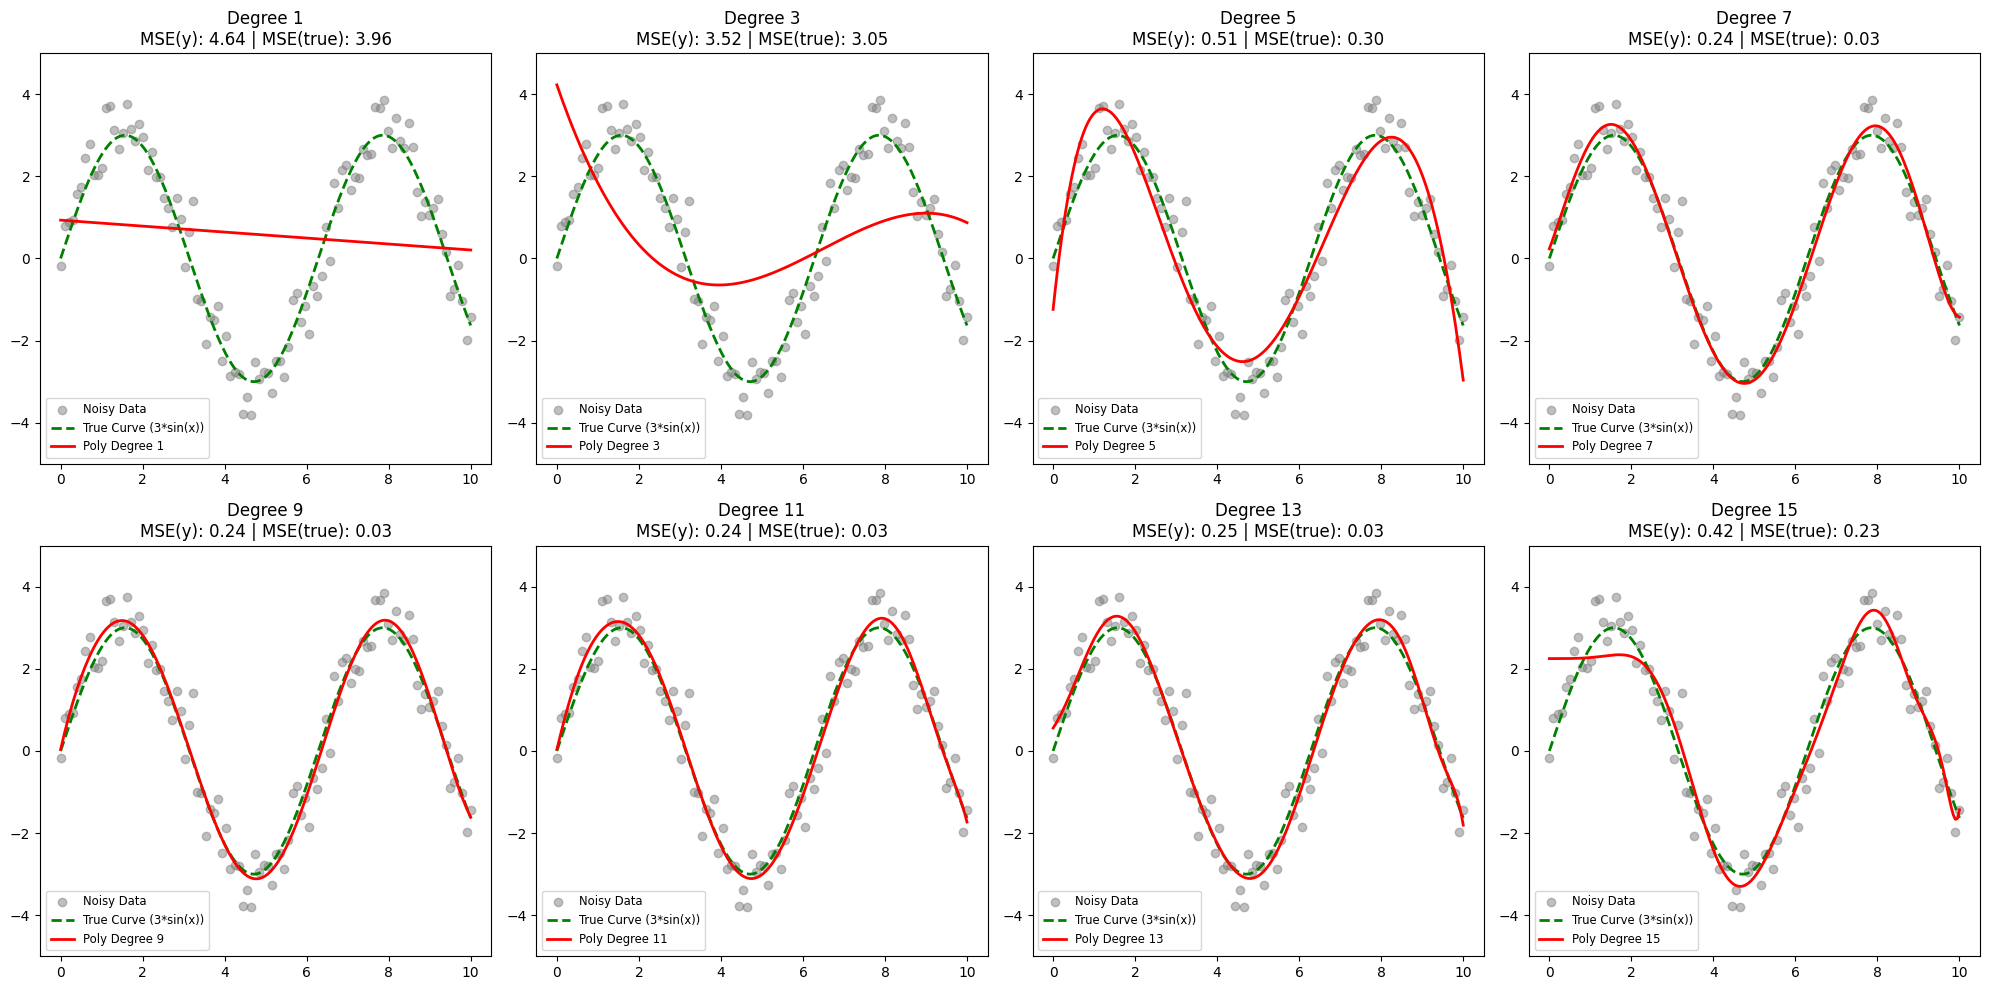

In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Function Description
def get_polynomial_features(x, d, include_bias=True):

    x = x.reshape(-1, 1)

    z = x

    for i in range(2, d + 1):
        z = np.hstack((z, x**i))

    if include_bias:
        ones = np.ones((len(x), 1))
        z = np.hstack((ones, z))

    return z

degrees = [1, 3, 5, 7, 9, 11, 13, 15]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

x_smooth = np.linspace(0, 10, 200)
y_true_smooth = 3 * np.sin(x_smooth)

print(f"{'Degree':<10} | {'MSE (Noisy Data)':<20} | {'MSE (True Curve)':<20}")
print("-" * 60)

for i, d in enumerate(degrees):

    X_poly_train = get_polynomial_features(x, d, include_bias=False)
    X_poly_smooth = get_polynomial_features(x_smooth, d, include_bias=False)

    model = LinearRegression()
    model.fit(X_poly_train, y)

    y_pred_train = model.predict(X_poly_train)
    y_pred_smooth = model.predict(X_poly_smooth)

    mse_noisy = mean_squared_error(y, y_pred_train)
    mse_true = mean_squared_error(3 * np.sin(x), y_pred_train)

    print(f"{d:<10} | {mse_noisy:<20.4f} | {mse_true:<20.4f}")

    ax = axes[i]

    ax.scatter(x, y, color='gray', alpha=0.5, label='Noisy Data')

    ax.plot(x_smooth, y_true_smooth, 'g--', linewidth=2, label='True Curve (3*sin(x))')

    ax.plot(x_smooth, y_pred_smooth, 'r-', linewidth=2, label=f'Poly Degree {d}')

    ax.set_title(f"Degree {d}\nMSE(y): {mse_noisy:.2f} | MSE(true): {mse_true:.2f}")
    ax.set_ylim(-5, 5) # Limit y-axis to keep plots readable
    ax.legend(fontsize='small')

plt.tight_layout()
plt.show()